Take a look at the cell below, containing code on how to do the dynamics with the toolbox applied on the AL5D_mdw. Run it and see its results. If you feel adventurous, try to change the input torques and see what happens.

┌──────┬────────┬─────────────────────────────┬────────────────────────┬────┬────┬────────┬────┐
│  j   │   m    │              r              │           I            │ Jm │ B  │   Tc   │ G  │
├──────┼────────┼─────────────────────────────┼────────────────────────┼────┼────┼────────┼────┤
│link1 │  0.187 │  0.0172, -0.00389,  0.00468 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  1 │
│link2 │  0.044 │  0.0708,  0,  0.0019        │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  1 │
│link3 │  0.207 │  0.0561, -0.00251, -0.0008  │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  1 │
│link4 │  0.043 │ -0.00011, -0.0375,  0.00742 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  1 │
│link5 │  0.064 │  0.0432,  0.00735, -0.00523 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  1 │
└──────┴────────┴─────────────────────────────┴────────────────────────┴────┴────┴────────┴────┘

None


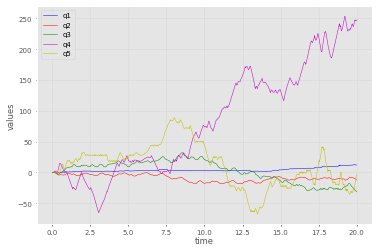

In [2]:
# 3. AL5D toolbox example

import roboticstoolbox as rtb
import numpy as np
import matplotlib.pyplot as plt
from math import pi 

# import the dh model of the Al5d_mdw
rob = rtb.models.DH.AL5D_mdw()
q = np.array([0,0,0,0,0])
qd = q

print(rob.dynamics())

# G, M, C matrices at position and velocity q and qd
G = rob.gravload(q)
M = rob.inertia(q)
C = rob.coriolis(q, qd)

# inputs sent to the model defined in this function
def no_torque_func(rob, t, q, qd):
    return np.zeros((rob.n, ))

tg = rob.fdyn(20, q, no_torque_func)
 
# plotting the joint coordinates
plt.figure(2)
plt.plot(tg.t, tg.q[:,0], 'b', label='q1')
plt.plot(tg.t, tg.q[:,1], 'r', label='q2')
plt.plot(tg.t, tg.q[:,2], 'g', label='q3')
plt.plot(tg.t, tg.q[:,3], 'm', label='q4')
plt.plot(tg.t, tg.q[:,4], 'y', label='q5')
plt.legend(loc='best')
plt.ylabel('values')
plt.xlabel('time')
plt.grid(True)

In [ ]:
from lab_functions import *
import swift

env = swift.Swift()
env.launch(realtime=True, browser='notebook')

al5d = rtb.models.URDF.AL5D_mdw()
al5d.q = [0,0,0,0,0]

arrived = False
env.add(al5d)

# # 3D visualisation of the al5d_mdw
steps = len(tg.q)

for i in range(steps):
    al5d.q = np.radians(tg.q[i,:])
    if i == 0:
        env.step(tg.t[i])
    else:
        env.step(tg.t[i]-tg.t[i-1])


Could not open specified browser, using default instead



connection handler failed
Traceback (most recent call last):
  File "C:\Users\UTCN-C12\.conda\envs\rcs_labs\lib\site-packages\websockets\legacy\server.py", line 224, in handler
    await self.ws_handler(self, path)
  File "C:\Users\UTCN-C12\.conda\envs\rcs_labs\lib\site-packages\swift\SwiftRoute.py", line 134, in serve
    await self.expect_message(websocket, expected)
  File "C:\Users\UTCN-C12\.conda\envs\rcs_labs\lib\site-packages\swift\SwiftRoute.py", line 139, in expect_message
    recieved = await websocket.recv()
  File "C:\Users\UTCN-C12\.conda\envs\rcs_labs\lib\site-packages\websockets\legacy\protocol.py", line 552, in recv
    await self.ensure_open()
  File "C:\Users\UTCN-C12\.conda\envs\rcs_labs\lib\site-packages\websockets\legacy\protocol.py", line 929, in ensure_open
    raise self.connection_closed_exc()
websockets.exceptions.ConnectionClosedOK: received 1001 (going away); then sent 1001 (going away)
